In [1]:
from optyx.diagram.channel import Circuit

In [2]:
from pytket import Circuit as tket_Circuit

circ = tket_Circuit(4, 2)   # qubits are numbered 0-3
#circ.Measure(0, 0)  # Z-basis measurement on qubit 0, saving result in bit 0
circ.CX(1, 2)
circ.CX(1, 3)
circ.H(1)

[CX q[1], q[2]; CX q[1], q[3]; H q[1]; ]

In [3]:
from pytket.circuit.display import render_circuit_jupyter

render_circuit_jupyter(circ)

In [4]:
render_circuit_jupyter(Circuit.from_tket(circ).to_tket())

In [5]:
Circuit.from_tket(circ)

optyx.diagram.channel.Circuit(inside=(monoidal.Layer(optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit'), optyx.diagram.channel.Ob('qubit')), optyx.circuit.qubit.zx.QubitChannel('X(1, 2)', optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit')), optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit'), optyx.diagram.channel.Ob('qubit'))), optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit'))), monoidal.Layer(optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit')), optyx.circuit.qubit.zx.QubitChannel('Z(2, 1)', optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit'), optyx.diagram.channel.Ob('qubit')), optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit'))), optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit'), optyx.diagram.channel.Ob('qubit'))), monoidal.Layer(optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit'), optyx.diagram.channel.Ob('qubit'), optyx.diagram.channel.Ob('qubit')), optyx.circuit.qubit.zx.QubitChannel('X(1, 2)', optyx.diagram

In [6]:
#QubitCircuit.from_tket(circ).to_dual_rail().draw()

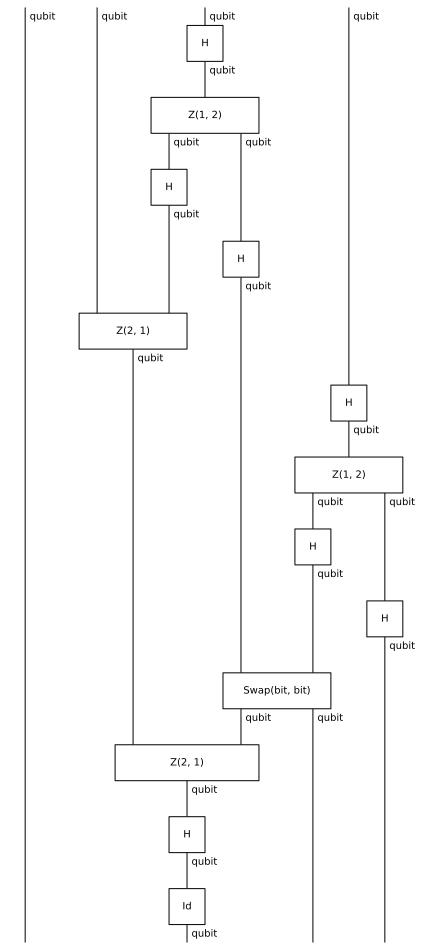

In [10]:
Circuit.from_tket(circ).decomp().draw()

In [8]:
from optyx.diagram.zx import Z, X
(Z(1, 1)).array

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

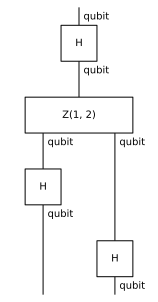

In [11]:
Circuit.from_tket(circ).inside[0][1].decomp().draw()

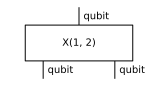

In [14]:
Circuit.from_tket(circ).inside[0][1].draw()

In [15]:
from optyx.circuit.qubit.zx import QubitChannel
from optyx.diagram.zx import X
from optyx.diagram.channel import qubit

QubitChannel.then(qubit@ QubitChannel("", X(1, 1)), qubit@ QubitChannel("", X(1, 1)))

optyx.diagram.channel.Circuit(inside=(monoidal.Layer(optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit')), optyx.circuit.qubit.zx.QubitChannel('', optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit')), optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit'))), optyx.diagram.channel.Ty()), monoidal.Layer(optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit')), optyx.circuit.qubit.zx.QubitChannel('', optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit')), optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit'))), optyx.diagram.channel.Ty())), dom=optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit'), optyx.diagram.channel.Ob('qubit')), cod=optyx.diagram.channel.Ty(optyx.diagram.channel.Ob('qubit'), optyx.diagram.channel.Ob('qubit')))

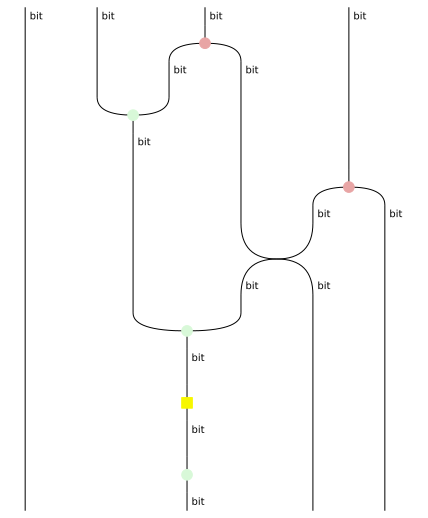

In [17]:
Circuit.from_tket(circ).get_kraus().draw()

In [20]:
from optyx.circuit.qmode.dual_rail.measurement import fusion_type_I, fusion_type_II

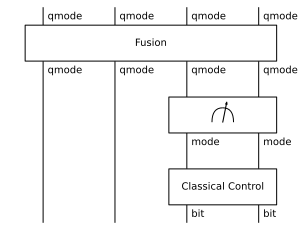

In [21]:
fusion_type_I.draw()

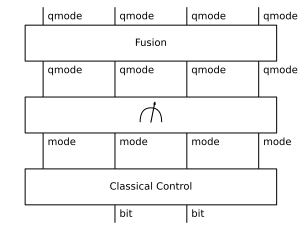

In [22]:
fusion_type_II.draw()

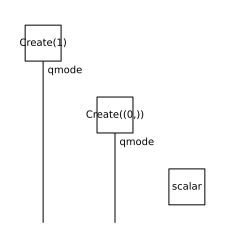

In [23]:
from optyx.circuit.qubit.zx import Z, X
X(0, 1).to_dual_rail().draw()

In [24]:
from optyx.circuit.qmode.measurement import DiscardQMode, NumberResolvingMeasurement

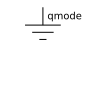

In [25]:
DiscardQMode(1).draw()

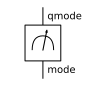

In [26]:
NumberResolvingMeasurement(1).draw()

In [1]:
from optyx.circuit.qmode.dual_rail.measurement import fusion_type_II
from optyx.circuit.qmode.dual_rail.gate import DualRail, PhaseShift
from optyx.circuit.qubit.zx import X
from optyx.diagram.channel import qmode, bit
from optyx.circuit.qmode.control import BitControlledGate
from optyx.diagram.zx import X as XSingle
from optyx.diagram.channel import CQMap

teleportation = (
    qmode**2 @ X(0, 2) >>
    qmode**2 @ DualRail(2) >>
    fusion_type_II @ qmode**2 >>
    CQMap("", XSingle(1, 0, 0.5), bit, bit**0) @ BitControlledGate(PhaseShift(0.5))
)

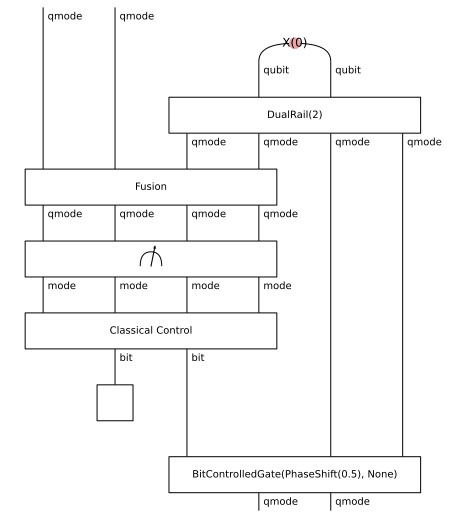

In [2]:
teleportation.draw()

In [4]:
(teleportation.double().to_zw().to_tensor().to_quimb()^...).data

array([[[[[[[[ 0.        +0.j,  0.        +0.j],
             [ 0.        +0.j,  0.        +0.j]],

            [[ 0.        +0.j,  0.70710678+0.j],
             [-0.        -0.j,  0.        +0.j]]],


           [[[ 0.        +0.j,  0.        -0.j],
             [ 0.70710678+0.j,  0.        +0.j]],

            [[ 0.        +0.j,  0.        +0.j],
             [ 0.        +0.j,  0.        +0.j]]]],



          [[[[ 0.        +0.j,  0.        +0.j],
             [ 0.        +0.j,  0.        +0.j]],

            [[ 0.        +0.j,  0.        +0.j],
             [ 0.        +0.j,  0.        +0.j]]],


           [[[ 0.        +0.j,  0.        +0.j],
             [ 0.        +0.j,  0.        +0.j]],

            [[ 0.        +0.j,  0.        +0.j],
             [ 0.        +0.j,  0.        +0.j]]]]],




         [[[[[ 0.        +0.j,  0.        +0.j],
             [ 0.        +0.j,  0.        +0.j]],

            [[ 0.        +0.j,  0.        +0.j],
             [ 0.        +0.j,  0.   